In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the data
df_train= pd.read_csv('Arabic Sentiment Analysis Dataset - SS2030.csv')
df_train.head()

,text,Sentiment
0,حقوق المرأة 💚💚💚 https://t.co/Mzf90Ta5g1,1
1,RT @___IHAVENOIDEA: حقوق المرأة في الإسلام. ht...,1
2,RT @saud_talep: Retweeted لجنة التنمية بشبرا (...,1
3,RT @MojKsa: حقوق المرأة التي تضمنها لها وزارة ...,1
4,RT @abm112211: ولي امر الزوجة او ولي الزوجة او...,1


In [2]:
#number of positive and negative reviews
df_train['Sentiment'].value_counts()

Sentiment
1    2436
0    1816
Name: count, dtype: int64

In [3]:
import aranorm
df_train['text']=df_train['text'].apply(aranorm.normalize_tweet)
df_train

,text,Sentiment
0,حقوق المراه يوجدرابط,1
1,حقوق المراه في الاسلام يوجدرابط,1
2,لجنه التنميه بشبرا ما زال التسجيل مستمر في دور...,1
3,حقوق المراه التي تضمنها لها وزاره العدل يوجدرابط,1
4,ولي امر الزوجه او ولي الزوجه او ولي المراه من ...,1
...,...,...
4247,غرد بحبك لمحمد بن سلمان,1
4248,غرد بحبك لمحمد بن سلمان محمدبن سلمان احبه الله...,1
4249,غرد بحبك لمحمد بن سلمان الله يحفظك يا ذخر الوط...,1
4250,غرد بحبك لمحمد بن سلمان الله يحفظه ويحميه ويقو...,1


In [4]:

def calculate_vocab_size(df, column_name):
    """
    Calculate the vocabulary size of a specific column in a pandas DataFrame.

    Parameters:
        df (pd.DataFrame): The DataFrame containing the text data.
        column_name (str): The name of the column to analyze.

    Returns:
        int: The size of the vocabulary (number of unique words).
    """
    # Concatenate all text data into one large string
    text_data = ' '.join(df[column_name].dropna().astype(str))
    
    # Split the text into words and convert to a set to remove duplicates
    vocab = set(text_data.split())
    
    # Return the size of the vocabulary
    return len(vocab)

# Calculate the vocabulary size of the 'text' column
vocab_size = calculate_vocab_size(df_train, 'text')

In [5]:
def max_text_length(df, column_name):
    """
    Calculate the maximum text length of entries in a specific column of a pandas DataFrame.

    Parameters:
        df (pd.DataFrame): The DataFrame containing the text data.
        column_name (str): The name of the column to analyze.

    Returns:
        int: The maximum length of text entries in the column, measured in words.
    """
    # Apply a function to each item in the column that calculates the number of words
    max_length = df[column_name].dropna().apply(lambda x: len(str(x).split())).max()
    
    return max_length

# Calculate the maximum text length of the 'text' column
max_length = max_text_length(df_train, 'text')


In [6]:
import numpy as np
import pandas as pd
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Embedding
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords

In [7]:
import pandas as pd
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from tensorflow.keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split

# Import Arabic stopwords
arabic_stopwords = set(stopwords.words('arabic'))

# Define function to tokenize text
def tokenize_text(text):
    return word_tokenize(text)

# Tokenize the text
df_train['tokenized_text'] = df_train['text'].apply(tokenize_text)

# Define function to remove stopwords
def remove_stopwords(tokens):
    return [word for word in tokens if word not in arabic_stopwords]

# Apply stopwords removal
df_train['clean_text'] = df_train['tokenized_text'].apply(remove_stopwords)

# Initialize the tokenizer
tokenizer = Tokenizer(num_words=vocab_size)
tokenizer.fit_on_texts(df_train['clean_text'])
sequences = tokenizer.texts_to_sequences(df_train['clean_text'])

# Pad the sequences
data_padded = pad_sequences(sequences, maxlen=max_length)

# Encode the labels
label_encoder = LabelEncoder()
data_labels = label_encoder.fit_transform(df_train['Sentiment'])
data_labels = to_categorical(data_labels)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(data_padded, data_labels, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)


Epoch 1/10
85/85 ━━━━━━━━━━━━━━━━━━━━ 4s 19ms/step - accuracy: 0.6648 - f1_score: 0.6175 - loss: 0.5956 - precision: 0.6585 - recall: 0.6373 - val_accuracy: 0.7871 - val_f1_score: 0.7774 - val_loss: 0.4457 - val_precision: 0.7885 - val_recall: 0.7665
Epoch 2/10
85/85 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - accuracy: 0.9284 - f1_score: 0.9268 - loss: 0.2151 - precision: 0.9352 - recall: 0.9177 - val_accuracy: 0.8473 - val_f1_score: 0.8468 - val_loss: 0.3127 - val_precision: 0.8557 - val_recall: 0.8443
Epoch 3/10
85/85 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - accuracy: 0.9936 - f1_score: 0.9934 - loss: 0.0361 - precision: 0.9938 - recall: 0.9926 - val_accuracy: 0.8605 - val_f1_score: 0.8603 - val_loss: 0.4692 - val_precision: 0.8624 - val_recall: 0.8561
Epoch 4/10
85/85 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - accuracy: 0.9934 - f1_score: 0.9932 - loss: 0.0130 - precision: 0.9971 - recall: 0.9934 - val_accuracy: 0.8855 - val_f1_score: 0.8831 - val_loss: 0.4651 - val_precision: 0.8837 - val_recall: 0.8

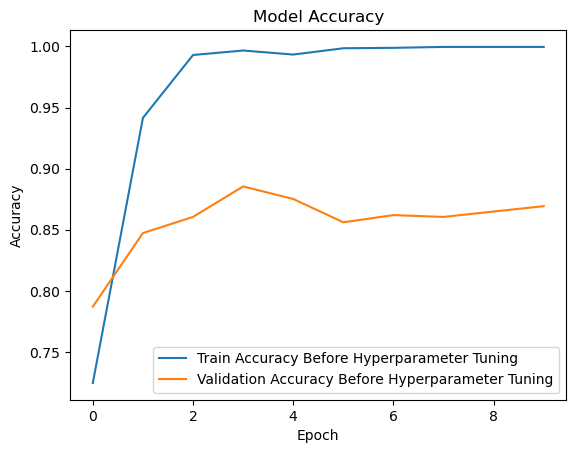

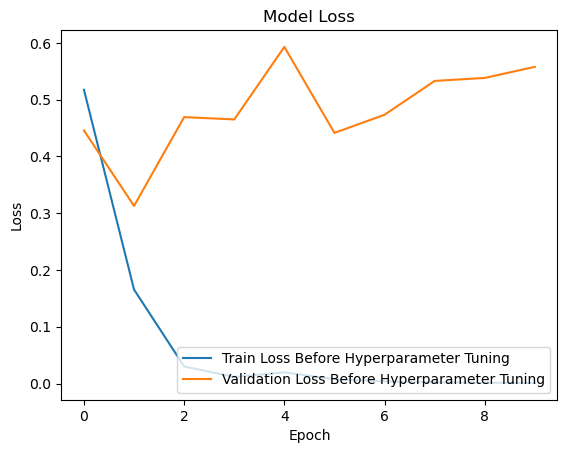

In [9]:
# Model parameters
embedding_dim = 128
lstm_units = 64

# Build the LSTMmodel1
LSTMmodel1 = Sequential()
LSTMmodel1.add(Embedding(vocab_size, embedding_dim))
LSTMmodel1.add(LSTM(lstm_units))
LSTMmodel1.add(Dense(2, activation='sigmoid'))

# Compile the LSTMmodel1
LSTMmodel1.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy' , 'precision', 'recall' , 'f1_score'])

# Train the LSTMmodel1
history = LSTMmodel1.fit(X_train, y_train, batch_size=32, epochs=10, validation_data=(X_val, y_val))

# Evaluate the LSTMmodel1
# Evaluate the model
loss, accuracy , precision, recall, f1 = LSTMmodel1.evaluate(X_test, y_test)
print(f'Test loss: {loss}')
print(f'Test accuracy: {accuracy}')
print(f'Test precision: {precision}')
print(f'Test recall: {recall}')
print(f'Test f1_score: {f1}')

# Optionally, plot training history
plt.plot(history.history['accuracy'], label='Train Accuracy Before Hyperparameter Tuning')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy Before Hyperparameter Tuning')
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(loc='lower right')
plt.show()

plt.plot(history.history['loss'], label='Train Loss Before Hyperparameter Tuning')
plt.plot(history.history['val_loss'], label='Validation Loss Before Hyperparameter Tuning')
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(loc='lower right')
plt.show()


In [10]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import accuracy_score

arabic_stopwords_list = list(arabic_stopwords)

# Use TF-IDF to convert text data to feature vectors
tfidf_vectorizer = TfidfVectorizer(max_features=vocab_size, stop_words=arabic_stopwords_list)
X_tfidf = tfidf_vectorizer.fit_transform(df_train['text'])

# We will use the label encoded data before converting to categorical
label_encoder = LabelEncoder()
data_labels = label_encoder.fit_transform(df_train['Sentiment'])

# Split the data (using the same random state for consistency)
X_train_tfidf, X_test_tfidf, y_train_tfidf, y_test_tfidf = train_test_split(X_tfidf, data_labels, test_size=0.2, random_state=42)

# Train a Random Forest to find important features
rf_model = RandomForestClassifier(n_estimators=100, random_state=123)
rf_model.fit(X_train_tfidf, y_train_tfidf)

# Feature importances
importances = rf_model.feature_importances_
feature_names = tfidf_vectorizer.get_feature_names_out()

# Sort the features by importance
important_features = sorted(zip(importances, feature_names), reverse=True)[:200]  # Select top 200 features

# Print or plot the important features
print("Top important features:", important_features[:20])


c:\ProgramData\anaconda3\Lib\site-packages\sklearn\feature_extraction\text.py:408: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['آمين', 'أب', 'أخ', 'أفعل', 'أفعله', 'ؤلاء', 'إل', 'إم', 'ات', 'اتان', 'ارتد', 'ان', 'انفك', 'برح', 'تان', 'تبد', 'تحو', 'تعل', 'حد', 'حم', 'حي', 'خب', 'ذار', 'سيما', 'صه', 'ظل', 'ظن', 'عد', 'قط', 'مر', 'مكان', 'مكانكن', 'نب', 'هات', 'هب', 'واها', 'وراء'] not in stop_words.
  warnings.warn(


Top important features: [(0.0409759134845806, 'عطاله'), (0.021560569725152856, 'الصحيه'), (0.020396005527212255, 'الولايه'), (0.020013502274798024, 'التخصصات'), (0.017560909947198215, 'سلمان'), (0.016438743645196662, 'نطلب'), (0.01504705526983567, 'الشعب'), (0.014202367680132263, 'المراه'), (0.011697921276403565, 'سعوديات'), (0.011428363535791826, 'ومحمد'), (0.011028156629292208, 'بحبك'), (0.010888054629498302, 'اسقاط'), (0.010287213945012863, 'السفاح'), (0.009469004552254759, 'بن'), (0.009401722585380766, 'قياده'), (0.008821308771404364, 'ضد'), (0.0077390159982122855, 'لمحمد'), (0.00681329726302921, 'يوجدرابط'), (0.006733804873751672, 'غرد'), (0.006697720761676228, 'مهندسون')]


In [11]:
# Create a new tokenizer with only the most important words
important_words = [word for _, word in important_features]
tokenizer = Tokenizer(num_words=len(important_words))
tokenizer.fit_on_texts(important_words)

# Apply this new tokenizer to your text data
sequences = tokenizer.texts_to_sequences(df_train['tokenized_text'])
data_padded = pad_sequences(sequences, maxlen=max_length)

# Continue with your existing LSTM model setup


Epoch 1/10
85/85 ━━━━━━━━━━━━━━━━━━━━ 3s 13ms/step - accuracy: 0.6801 - f1_score: 0.6160 - loss: 0.5623 - precision: 0.7081 - recall: 0.6370 - val_accuracy: 0.8385 - val_f1_score: 0.8312 - val_loss: 0.3438 - val_precision: 0.8402 - val_recall: 0.8341
Epoch 2/10
85/85 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.8447 - f1_score: 0.8383 - loss: 0.3315 - precision: 0.8467 - recall: 0.8379 - val_accuracy: 0.8576 - val_f1_score: 0.8533 - val_loss: 0.3222 - val_precision: 0.8576 - val_recall: 0.8576
Epoch 3/10
85/85 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.8474 - f1_score: 0.8408 - loss: 0.3198 - precision: 0.8475 - recall: 0.8475 - val_accuracy: 0.8590 - val_f1_score: 0.8552 - val_loss: 0.3149 - val_precision: 0.8614 - val_recall: 0.8488
Epoch 4/10
85/85 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.8550 - f1_score: 0.8486 - loss: 0.2999 - precision: 0.8553 - recall: 0.8550 - val_accuracy: 0.8517 - val_f1_score: 0.8459 - val_loss: 0.3090 - val_precision: 0.8477 - val_recall: 0.8502

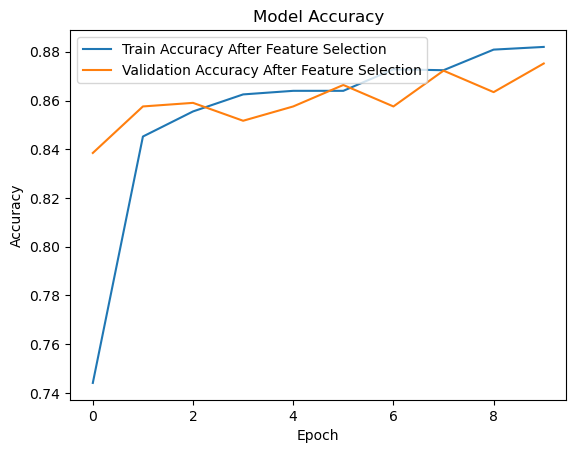

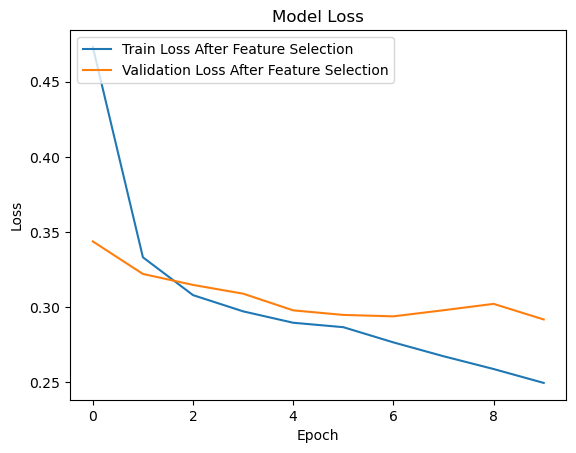

In [12]:
from tensorflow.keras.utils import to_categorical

# Pad the sequences to ensure uniform input size
data_padded = pad_sequences(sequences, maxlen=max_length)

# Re-encode the labels since we are redefining our input
label_encoder = LabelEncoder()
data_labels = label_encoder.fit_transform(df_train['Sentiment'])
data_labels = to_categorical(data_labels)

# Perform train-test split again
X_train, X_test, y_train, y_test = train_test_split(data_padded, data_labels, test_size=0.2, random_state=123)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=123)

# Define the LSTM model architecture
LSTMmodel1 = Sequential()
LSTMmodel1.add(Embedding(len(important_words), embedding_dim))  # Use the length of important_words for vocab size
LSTMmodel1.add(LSTM(lstm_units))
LSTMmodel1.add(Dense(2, activation='sigmoid'))  # Output layer for two classes

# Compile the model
LSTMmodel1.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy' , 'precision', 'recall' , 'f1_score'])

# Train the LSTM model
history = LSTMmodel1.fit(X_train, y_train, batch_size=32, epochs=10, validation_data=(X_val, y_val))

# Evaluate the model
loss, accuracy , precision, recall, f1 = LSTMmodel1.evaluate(X_test, y_test)
print(f'Test loss: {loss}')
print(f'Test accuracy: {accuracy}')
print(f'Test precision: {precision}')
print(f'Test recall: {recall}')
print(f'Test f1_score: {f1}')


# Optionally, plot training history
plt.plot(history.history['accuracy'], label='Train Accuracy After Feature Selection')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy After Feature Selection')
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(loc='upper left')
plt.show()

plt.plot(history.history['loss'], label='Train Loss After Feature Selection')
plt.plot(history.history['val_loss'], label='Validation Loss After Feature Selection')
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(loc='upper left')
plt.show()


## Hyperparameter tuning for LSTM

In [13]:
# #Hyperparameter tuning
# from tensorflow.keras.models import Sequential
# from tensorflow.keras.layers import Embedding, LSTM, Dense
# import tensorflow as tf
# from keras_tuner import HyperModel
# from keras_tuner.tuners import Hyperband

# class MyModel(HyperModel):
#     def __init__(self, vocab_size):
#         self.vocab_size = vocab_size
    
#     def build(self, hp):
#         model = Sequential()
#         model.add(Embedding(
#             input_dim=self.vocab_size, 
#             output_dim=hp.Int('embedding_dim', min_value=32, max_value=128, step=32)))
#         model.add(LSTM(
#             units=hp.Int('lstm_units', min_value=64, max_value=256, step=64)))
#         model.add(Dense(2, activation='sigmoid'))
        
#         model.compile(optimizer='adam',
#                       loss='categorical_crossentropy',
#                       metrics=['accuracy'])
#         return model

# tuner = Hyperband(
#     MyModel(vocab_size),
#     objective='val_accuracy',
#     max_epochs=10,
#     directory='my_dir',
#     project_name='keras_tuner_demo'
# )

# # Define early stopping callback
# stop_early = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=5)

# # Start the search for the best hyperparameter configuration
# tuner.search(X_train, y_train, epochs=10, validation_data=(X_val, y_val), callbacks=[stop_early])

# # Get the optimal hyperparameters
# best_hps = tuner.get_best_hyperparameters(num_trials=1)[0]
# print(f"""
# The hyperparameter search is complete. The optimal embedding dimension is {best_hps.get('embedding_dim')} 
# and the optimal number of LSTM units is {best_hps.get('lstm_units')}.
# """)

Epoch 1/10
85/85 ━━━━━━━━━━━━━━━━━━━━ 3s 13ms/step - accuracy: 0.6588 - f1_score: 0.5571 - loss: 0.5972 - precision: 0.6589 - recall: 0.6444 - val_accuracy: 0.8355 - val_f1_score: 0.8288 - val_loss: 0.3470 - val_precision: 0.8390 - val_recall: 0.8341
Epoch 2/10
85/85 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.8563 - f1_score: 0.8478 - loss: 0.3289 - precision: 0.8534 - recall: 0.8600 - val_accuracy: 0.8605 - val_f1_score: 0.8540 - val_loss: 0.3095 - val_precision: 0.8605 - val_recall: 0.8605
Epoch 3/10
85/85 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.8524 - f1_score: 0.8471 - loss: 0.3080 - precision: 0.8525 - recall: 0.8543 - val_accuracy: 0.8649 - val_f1_score: 0.8597 - val_loss: 0.2990 - val_precision: 0.8613 - val_recall: 0.8664
Epoch 4/10
85/85 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.8729 - f1_score: 0.8674 - loss: 0.2954 - precision: 0.8696 - recall: 0.8755 - val_accuracy: 0.8620 - val_f1_score: 0.8554 - val_loss: 0.2919 - val_precision: 0.8584 - val_recall: 0.8634

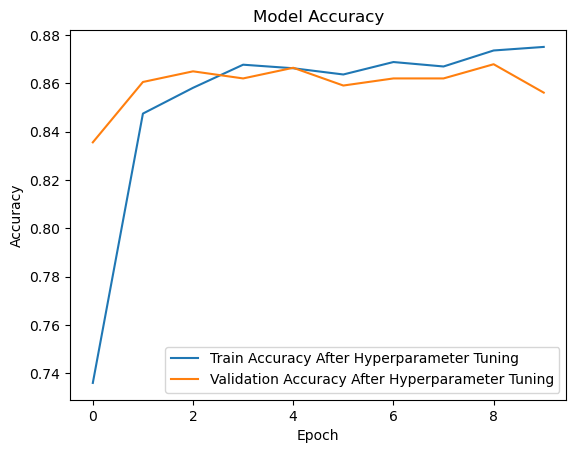

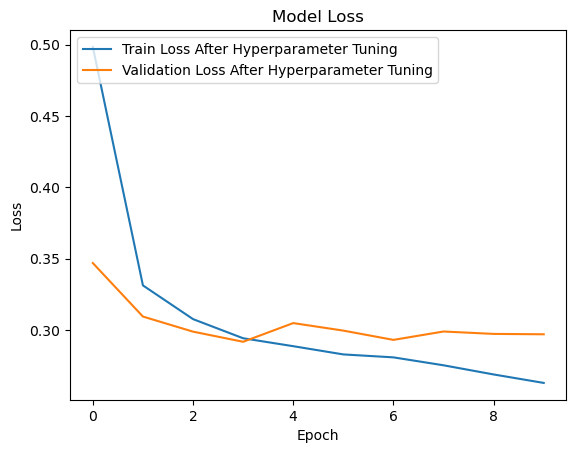

In [14]:
# Build the model with the optimal hyperparameters and train it
# Define the LSTM model architecture
LSTMmodel1 = Sequential()
LSTMmodel1.add(Embedding(len(important_words), 64))  # Use the length of important_words for vocab size
LSTMmodel1.add(LSTM(64))
LSTMmodel1.add(Dense(2, activation='sigmoid'))  # Output layer for two classes

# Compile the model
LSTMmodel1.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy' , 'precision', 'recall' , 'f1_score'])

# Train the LSTM model
history = LSTMmodel1.fit(X_train, y_train, batch_size=32, epochs=10, validation_data=(X_val, y_val))

# Evaluate the model
loss, accuracy , precision, recall, f1 = LSTMmodel1.evaluate(X_test, y_test)
print(f'Test loss: {loss}')
print(f'Test accuracy: {accuracy}')
print(f'Test precision: {precision}')
print(f'Test recall: {recall}')
print(f'Test f1_score: {f1}')


# Optionally, plot training history
plt.plot(history.history['accuracy'], label='Train Accuracy After Hyperparameter Tuning')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy After Hyperparameter Tuning')
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(loc='lower right')
plt.show()

plt.plot(history.history['loss'], label='Train Loss After Hyperparameter Tuning')
plt.plot(history.history['val_loss'], label='Validation Loss After Hyperparameter Tuning')
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(loc='upper left')
plt.show()



In [15]:
#use model to predict
df=pd.read_csv('afterPP_dataset.csv')
df.dropna(inplace=True)

#covert to str
df['Reviews'] = df['Reviews'].astype(str)

In [16]:

# label the unlabeled data
df['tokenized_text'] = df['Reviews'].apply(tokenize_text)
# Tokenize the text
tokenizer = Tokenizer(num_words=vocab_size)
tokenizer.fit_on_texts(df['tokenized_text'])
sequences = tokenizer.texts_to_sequences(df['tokenized_text'])

# Pad the sequences
data_padded = pad_sequences(sequences, maxlen=max_length)
# Predict labels for the unlabeled dataset
predicted_labels = LSTMmodel1.predict(data_padded)

import numpy as np

# Assuming your model's output is sigmoid and you have two classes
# Convert probabilities to class labels
predicted_class_indices = np.argmax(predicted_labels, axis=1)

# If you need the labels as '0' or '1'
predicted_class_labels = ["0" if label == 0 else "1" for label in predicted_class_indices]

# Now, predicted_class_labels contains the class labels ('0' or '1') for each sample
df['Predicted_Labels'] = predicted_class_labels


13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step


In [17]:
df

,Reviews,tokenized_text,Predicted_Labels
0,كان لي تجربه اكثر من راءعه اليوم في هذا الفرع ...,"[كان, لي, تجربه, اكثر, من, راءعه, اليوم, في, ه...",0
1,اسوء خدمه شركه اتصالات علي المستوي العربي كله ...,"[اسوء, خدمه, شركه, اتصالات, علي, المستوي, العر...",0
2,اشكر الموظفه ضيء علي تعاملها ورقيها وخدمتها لي...,"[اشكر, الموظفه, ضيء, علي, تعاملها, ورقيها, وخد...",0
3,اسوا نت في العالم عانيت مليون مرررررا منهم رفع...,"[اسوا, نت, في, العالم, عانيت, مليون, مرررررا, ...",0
4,الفرع جدا ممتاز واشكر الاخوات الموظفات علي رحا...,"[الفرع, جدا, ممتاز, واشكر, الاخوات, الموظفات, ...",0
...,...,...,...
382,التذكره ايش صار عليها محد فيكم تكرم تواصل معي ...,"[التذكره, ايش, صار, عليها, محد, فيكم, تكرم, تو...",0
383,قويه,[قويه],0
384,انترنت لا محدود سرعه ميقا زين السعوديه,"[انترنت, لا, محدود, سرعه, ميقا, زين, السعوديه]",1
385,سرعه عاليه ميجا ال زين يارب وماخاب من قال يارب,"[سرعه, عاليه, ميجا, ال, زين, يارب, وماخاب, من,...",0


## Hyperparameter Tuning for RNN

In [18]:
# from keras.models import Sequential
# from keras.layers import Embedding, SimpleRNN, Dense
# from keras_tuner import HyperModel, Hyperband
# import tensorflow as tf

# class MyModel(HyperModel):
#     def __init__(self, vocab_size):
#         self.vocab_size = vocab_size

#     def build(self, hp):
#         model = Sequential()
#         model.add(Embedding(
#             input_dim=self.vocab_size,
#             output_dim=hp.Int('embedding_dim', min_value=32, max_value=128, step=32),
#             mask_zero=True))  # mask_zero=True to handle padding for RNN
#         model.add(SimpleRNN(
#             units=hp.Int('rnn_units', min_value=64, max_value=256, step=64),
#             return_sequences=False))  # return_sequences=False if only the last output is needed
#         model.add(Dense(2, activation='sigmoid'))
        
#         model.compile(optimizer='adam',
#                       loss='categorical_crossentropy',
#                       metrics=['accuracy'])
#         return model

# # Instantiate the tuner
# tuner = Hyperband(
#     MyModel(vocab_size),
#     objective='val_accuracy',
#     max_epochs=10,
#     directory='my_dir',
#     project_name='keras_tuner_demo_rnn'
# )

# # Define early stopping callback
# stop_early = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=5)

# # Start the search for the best hyperparameter configuration
# tuner.search(X_train, y_train, epochs=10, validation_data=(X_val, y_val), callbacks=[stop_early])

# # Get the optimal hyperparameters
# best_hps = tuner.get_best_hyperparameters(num_trials=1)[0]
# print(f"""
# The hyperparameter search is complete. The optimal embedding dimension is {best_hps.get('embedding_dim')} 
# and the optimal number of RNN units is {best_hps.get('rnn_units')}.
# """)



Epoch 1/10
85/85 ━━━━━━━━━━━━━━━━━━━━ 4s 18ms/step - accuracy: 0.7205 - f1_score: 0.6994 - loss: 0.5710 - precision: 0.7193 - recall: 0.6907 - val_accuracy: 0.8443 - val_f1_score: 0.8387 - val_loss: 0.3698 - val_precision: 0.8472 - val_recall: 0.8385
Epoch 2/10
85/85 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.8421 - f1_score: 0.8306 - loss: 0.3488 - precision: 0.8394 - recall: 0.8403 - val_accuracy: 0.8135 - val_f1_score: 0.8077 - val_loss: 0.3803 - val_precision: 0.8248 - val_recall: 0.8018
Epoch 3/10
85/85 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.8527 - f1_score: 0.8420 - loss: 0.3172 - precision: 0.8582 - recall: 0.8506 - val_accuracy: 0.8443 - val_f1_score: 0.8378 - val_loss: 0.3303 - val_precision: 0.8421 - val_recall: 0.8458
Epoch 4/10
85/85 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.8778 - f1_score: 0.8718 - loss: 0.2859 - precision: 0.8791 - recall: 0.8783 - val_accuracy: 0.8605 - val_f1_score: 0.8543 - val_loss: 0.3156 - val_precision: 0.8588 - val_recall: 0.8

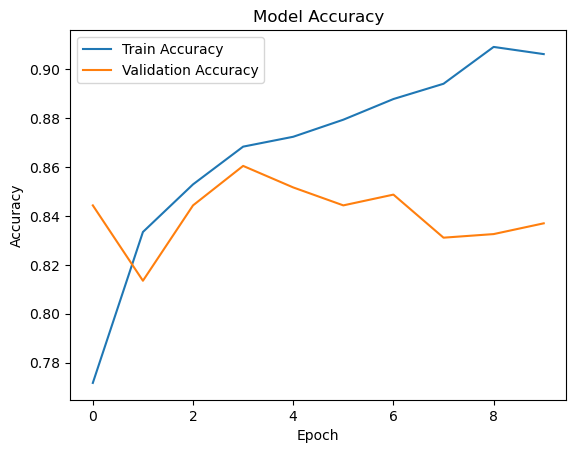

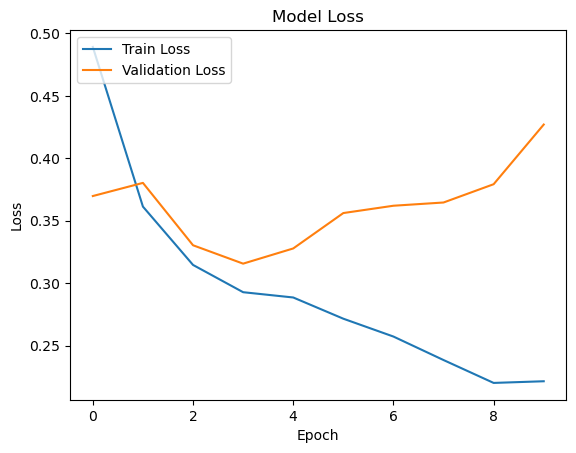

In [20]:
#Bulid RNN after hyperparameter tuning

from keras.models import Sequential
from keras.layers import Embedding, SimpleRNN, Dense
from keras_tuner import HyperModel, Hyperband

# Build the RNN model with the optimal hyperparameters
RNNmodel = Sequential()
RNNmodel.add(Embedding(vocab_size, 32, mask_zero=True))
RNNmodel.add(SimpleRNN(256, return_sequences=False))
RNNmodel.add(Dense(2, activation='sigmoid'))

# Compile the model
RNNmodel.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy' , 'precision', 'recall' , 'f1_score'])

# Train the model
history = RNNmodel.fit(X_train, y_train, batch_size=32, epochs=10, validation_data=(X_val, y_val))

# Evaluate the model
loss, accuracy , precision, recall, f1 = RNNmodel.evaluate(X_test, y_test)
print(f'Test loss: {loss}')
print(f'Test accuracy: {accuracy}')
print(f'Test precision: {precision}')
print(f'Test recall: {recall}')
print(f'Test f1_score: {f1}')


# Optionally, plot training history
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(loc='upper left')
plt.show()

plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(loc='upper left')
plt.show()

## transformer

In [21]:
from transformers import pipeline
import torch 
import pandas as pd
from torch.utils.data import Dataset
from transformers import AutoTokenizer, AutoModelForSequenceClassification
from transformers import BertTokenizer, BertForSequenceClassification
from transformers import Trainer, TrainingArguments
from sklearn.model_selection import train_test_split
from transformers import DistilBertTokenizerFast
from datasets import load_dataset

# trying aubmindlab/bert-base-arabertv02-twitter

model_name = "CAMeL-Lab/bert-base-arabic-camelbert-da-sentiment"  # Replace with the specific model you find
tokenizer = AutoTokenizer.from_pretrained(model_name)
model = AutoModelForSequenceClassification.from_pretrained(model_name)

nlp = pipeline("sentiment-analysis", model=model, tokenizer=tokenizer, truncation=True, padding=True, max_length=512)

# Function to apply sentiment analysis
def analyze_sentiment(text):
    result = nlp(text)
    return result[0]['label']

# Apply the function to your DataFrame
df_train['T-Sentiment1'] = df_train['text'].apply(analyze_sentiment)





In [22]:
#drop neutral
df_train = df_train[df_train['T-Sentiment1'] != 'neutral']

In [23]:
#convert postive to 1 and negative to 0
df_train['T-Sentiment1'] = df_train['T-Sentiment1'].apply(lambda x: 1 if x == 'positive' else 0)

C:\Users\Admin\AppData\Local\Temp\ipykernel_6920\1633748934.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train['T-Sentiment1'] = df_train['T-Sentiment1'].apply(lambda x: 1 if x == 'positive' else 0)


In [24]:
# Measure accuracy, precision, recall, and F1 score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Calculate accuracy
accuracy = accuracy_score(df_train['Sentiment'], df_train['T-Sentiment1'])
precision = precision_score(df_train['Sentiment'], df_train['T-Sentiment1'])
recall = recall_score(df_train['Sentiment'], df_train['T-Sentiment1'])
f1 = f1_score(df_train['Sentiment'], df_train['T-Sentiment1'])

print(f'Accuracy: {accuracy}, Precision: {precision}, Recall: {recall}, F1 Score: {f1}')

Accuracy: 0.7200821777092964, Precision: 0.9375506893755069, Recall: 0.532964499769479, F1 Score: 0.6796002351557907


In [25]:
from nltk.tokenize import RegexpTokenizer
df_for_tokenization = df.copy()
tokenizer = RegexpTokenizer(r'\w+')
df_for_tokenization["Reviews"] = df_for_tokenization["Reviews"].apply(tokenizer.tokenize)
stopwords_list = stopwords.words('arabic')
listToStr = ' '.join([str(elem) for elem in stopwords_list])
df_for_tokenization["Reviews"] = df_for_tokenization["Reviews"].apply(lambda x: [item for item in x if item not in listToStr])
df_for_tokenization

,Reviews,tokenized_text,Predicted_Labels
0,"[تجربه, اكثر, راءعه, اليوم, الفرع, الخدمه, الم...","[كان, لي, تجربه, اكثر, من, راءعه, اليوم, في, ه...",0
1,"[اسوء, خدمه, شركه, اتصالات, المستوي, العربي, ك...","[اسوء, خدمه, شركه, اتصالات, علي, المستوي, العر...",0
2,"[اشكر, الموظفه, ضيء, تعاملها, ورقيها, وخدمتها,...","[اشكر, الموظفه, ضيء, علي, تعاملها, ورقيها, وخد...",0
3,"[اسوا, العالم, عانيت, مليون, مرررررا, منهم, رف...","[اسوا, نت, في, العالم, عانيت, مليون, مرررررا, ...",0
4,"[الفرع, جدا, ممتاز, واشكر, الاخوات, الموظفات, ...","[الفرع, جدا, ممتاز, واشكر, الاخوات, الموظفات, ...",0
...,...,...,...
382,"[التذكره, ايش, عليها, محد, فيكم, تكرم, تواصل, ...","[التذكره, ايش, صار, عليها, محد, فيكم, تكرم, تو...",0
383,[قويه],[قويه],0
384,"[انترنت, محدود, سرعه, ميقا, زين, السعوديه]","[انترنت, لا, محدود, سرعه, ميقا, زين, السعوديه]",1
385,"[سرعه, عاليه, ميجا, زين, يارب, وماخاب, قال, يارب]","[سرعه, عاليه, ميجا, ال, زين, يارب, وماخاب, من,...",0


In [28]:
import matplotlib.pyplot as plt
from collections import Counter
import arabic_reshaper
from bidi.algorithm import get_display
from nltk import ngrams
import seaborn as sns
import pandas as pd

def get_most_common_ngrams_by_class(sentiment_df, sentiment, ngram_size=2, n=10):
    """Get the most common n-grams for each class."""
    classes = sentiment_df[sentiment].unique()
    common_ngrams = {}

    for cls in classes:
        # Create a list of all words in the reviews for the current class
        words = [word for sublist in sentiment_df[sentiment_df[sentiment] == cls]['Reviews'] for word in sublist]
        # Generate n-grams
        n_grams = ngrams(words, ngram_size)
        # Count and get the most common n-grams
        most_common = Counter(n_grams).most_common(n)
        common_ngrams[cls] = most_common

    return common_ngrams

def plot_most_common_ngrams(common_ngrams):
    """Plot the most common n-grams for each class, applying Arabic reshaping."""
    # Create a figure with subplots
    fig, axes = plt.subplots(len(common_ngrams), 1, figsize=(10, 15), squeeze=False)
    fig.tight_layout(pad=8.0)
    
    for i, (cls, ngrams) in enumerate(common_ngrams.items()):
        phrases, frequencies = zip(*ngrams)
        # Convert tuple n-grams to string and reshape for correct Arabic rendering
        reshaped_phrases = [' '.join(ngram) for ngram in phrases]
        reshaped_phrases = [get_display(arabic_reshaper.reshape(phrase)) for phrase in reshaped_phrases]
        
        ax = sns.barplot(x=list(frequencies), y=reshaped_phrases, ax=axes[i, 0])
        ax.set_title(f'Most Common Phrases in {get_display(arabic_reshaper.reshape(cls))}', fontsize=16)
        
        # Set font for both title and y-tick labels to a readable Arabic font
        ax.title.set_fontname('sans')
        # for label in ax.get_yticklabels():
        #     label.set_fontname('SF Arabic')
        
    plt.show()

c:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1765: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)
c:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1765: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)


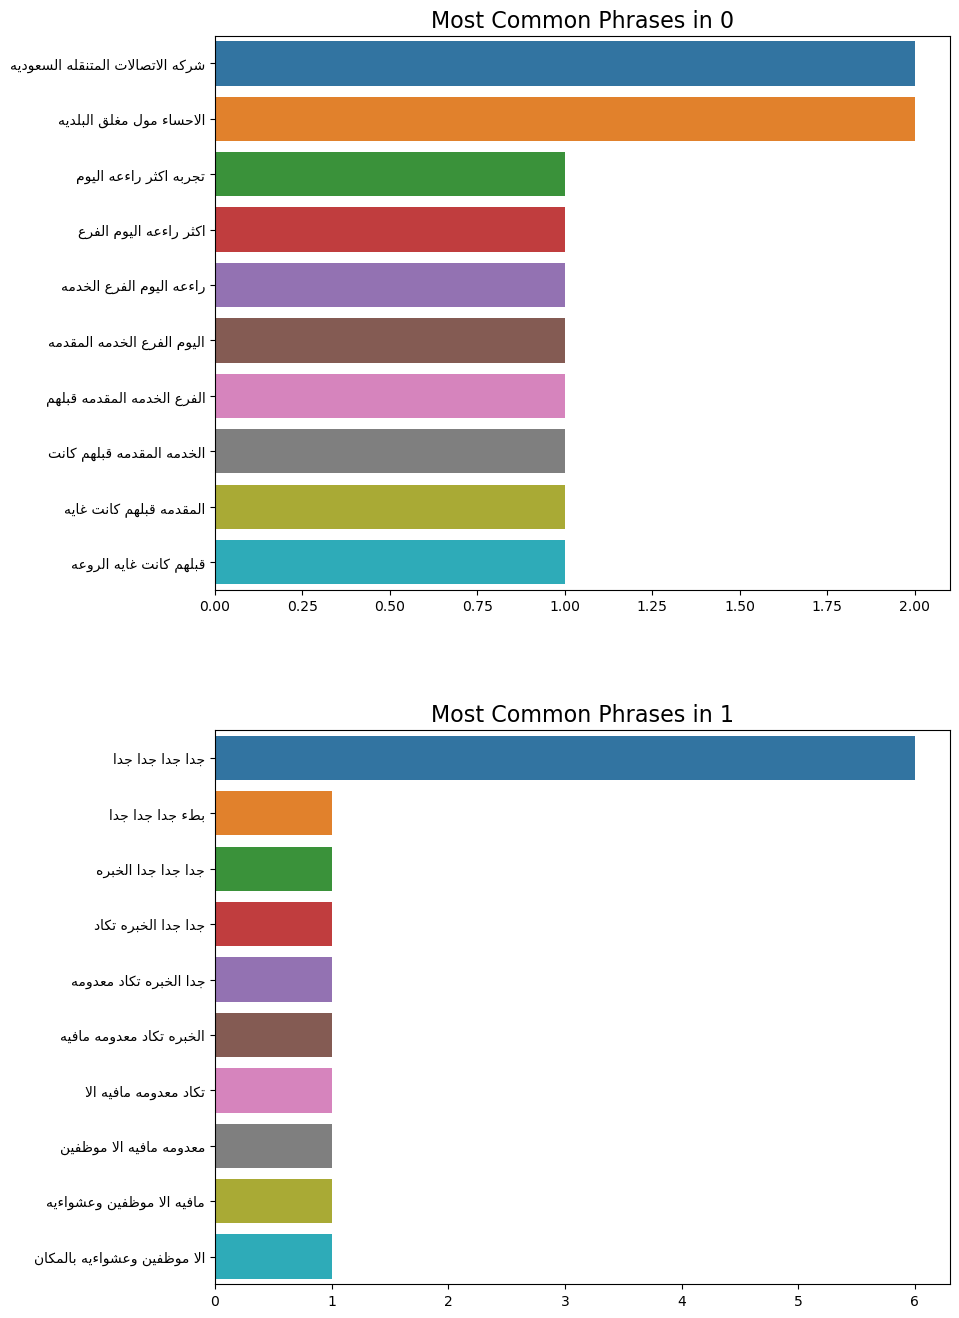

In [29]:
# Get the most common words by class for the 'sentiment' column
common_words = get_most_common_ngrams_by_class(df_for_tokenization,'Predicted_Labels' ,ngram_size=4, n=10)  # Adjust n as needed

# Plot the most common words
plot_most_common_ngrams(common_words)

## Using XAI

157/157 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step
Text: كان لي تجربه اكثر من راءعه اليوم في هذا الفرع و الخدمه المقدمه من قبلهم كانت في غايه الروعه الاستاذه ضي و الاستاذ حسين انتم قدوه لشباب الوطن الشغوف اتمناء لكم المزيد من التوفيق والنجاح و شكرا
Explanation: [('هذا', 2.4215282114270697e-32), ('و', -1.7017546996523505e-32), ('كان', -1.6069878084275762e-32), ('في', 1.106437279788409e-32), ('قبلهم', 1.0915853201040955e-32), ('الخدمه', -1.0876724530132894e-32), ('قدوه', 9.328039527285293e-33), ('غايه', 8.875131343303691e-33), ('المقدمه', -8.790786357799826e-33), ('التوفيق', 6.289647639561354e-33), ('الاستاذ', 6.170959347709874e-33), ('الشغوف', 5.998102912318819e-33), ('اتمناء', -5.8067446868036264e-33), ('الفرع', -2.82769191919187e-33), ('انتم', 2.0180618685633186e-33)]


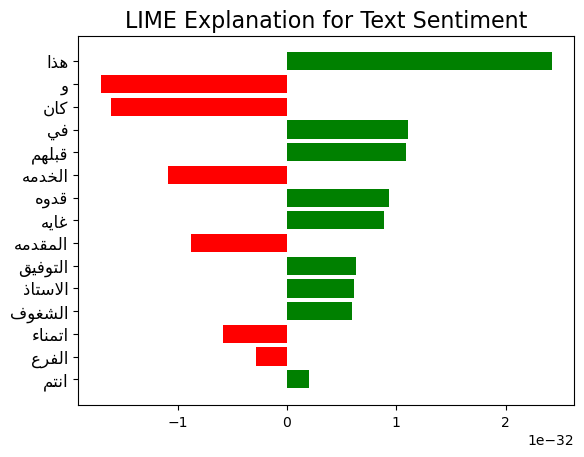

In [34]:
from lime.lime_text import LimeTextExplainer
import matplotlib.pyplot as plt
from collections import Counter
import arabic_reshaper
from bidi.algorithm import get_display
from nltk import ngrams
import seaborn as sns
import pandas as pd
from nltk.tokenize import RegexpTokenizer
# Explaining predictions using LIME
explainer = LimeTextExplainer(class_names=['Negative', 'Positive'])
tokenizer = Tokenizer(num_words=vocab_size)
def predict_proba(texts):
    # Convert texts to padded sequences
    seqs = tokenizer.texts_to_sequences(texts)
    padded_seqs = pad_sequences(seqs, maxlen=100)
    # Predict
    return LSTMmodel1.predict(padded_seqs)

# Pick a text to explain
text_to_explain = df['Reviews'][0]  # Change the index for different texts

# Generate explanation
exp = explainer.explain_instance(text_to_explain, predict_proba, num_features=15)
print('Text:', text_to_explain)
print('Explanation:', exp.as_list())

# Function to reshape and get display text for Arabic
def reshape_texts(texts):
    return [get_display(arabic_reshaper.reshape(text)) for text in texts]

fig, ax = plt.subplots()
vals = [x[1] for x in exp.as_list()]  # Assuming exp.as_list() gives you the list of features and their weights
names = [x[0] for x in exp.as_list()]  # Original names in Arabic
reshaped_names = reshape_texts(names)  # Reshape Arabic texts
vals.reverse()
reshaped_names.reverse()
colors = ['green' if x > 0 else 'red' for x in vals]
pos = range(len(exp.as_list()))
ax.barh(pos, vals, align='center', color=colors)
ax.set_yticks(pos)
ax.set_yticklabels(reshaped_names, fontdict={'fontsize': 12})  # Optionally adjust font size
ax.set_title('LIME Explanation for Text Sentiment', fontdict={'fontsize': 16})

plt.show()
